# Real Estate Price_Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv("Housing_data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

0    470
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# housing.hist(bins=50, figsize=(20,15))
# plt.show()

## Train-Test Splitting

In [8]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))

404


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index , test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [12]:
strat_test_set['CHAS'].value_counts()

0    94
1     7
Name: CHAS, dtype: int64

## Looking for Correlations

In [13]:
housing["TAXRM"] = housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,34.525661


In [14]:
corr_matrix = housing.corr()

In [15]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695365
ZN         0.360393
B          0.333394
DIS        0.249896
CHAS       0.175364
AGE       -0.376932
RAD       -0.381690
CRIM      -0.388249
NOX       -0.427295
TAX       -0.468543
INDUS     -0.484126
PTRATIO   -0.508411
TAXRM     -0.537700
LSTAT     -0.738187
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>]], dtype=object)

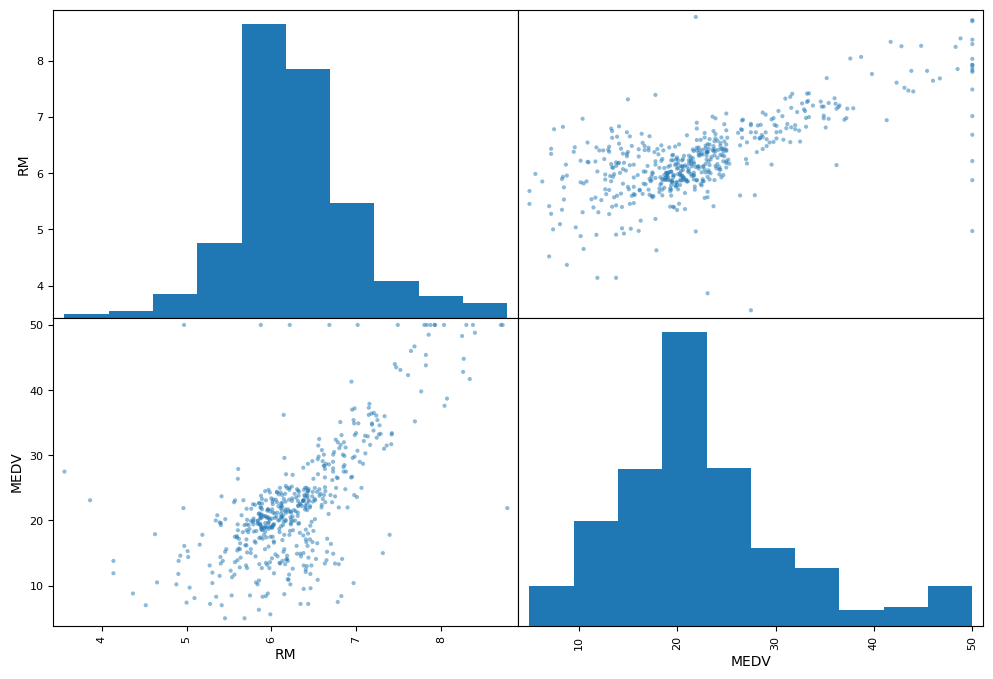

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["RM", "MEDV"]
scatter_matrix(housing[attributes], figsize = (12,8))

In [17]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [18]:
# a = housing.dropna(subset=["RM"])
# a.shape

In [19]:
median = housing["RM"].median()
housing["RM"].fillna(median)

254    5.876
348    6.939
476    5.304
321    6.041
326    6.083
       ...  
154    6.152
423    5.565
98     7.416
455    5.976
215    5.888
Name: RM, Length: 404, dtype: float64

In [20]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.251631,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.688800,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.874750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.179000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [22]:
imputer.statistics_.shape

(13,)

In [23]:
X = imputer.transform(housing)

In [24]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [25]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.680733,10.189356,11.305965,0.069307,0.557274,6.251631,68.548020,3.778549,9.702970,411.428218,18.502723,353.522649,12.833292
std,8.249705,21.930822,6.817698,0.254290,0.116503,0.688800,28.433028,2.125958,8.754489,168.237476,2.117437,95.111003,7.199418
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.090060,0.000000,5.190000,0.000000,0.452000,5.874750,44.850000,2.070275,4.000000,284.000000,17.400000,374.237500,7.362500
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.179000,77.500000,3.167500,5.000000,336.000000,19.050000,390.940000,11.570000
75%,3.694070,3.125000,18.100000,0.000000,0.625750,6.604500,94.600000,5.104475,24.000000,666.000000,20.200000,396.157500,16.977500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Creating Pipeline

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeine = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [27]:
housing_num_tr = my_pipeine.fit_transform(housing)

In [28]:
housing_num_tr.shape

(404, 13)

## Desired Model

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# model = LinearRegression()
# model =  DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [30]:
some_data = housing.iloc[:5]

In [31]:
some_labels = housing_labels.iloc[:5]

In [32]:
prepared_data = my_pipeine.transform(some_data)

In [33]:
model.predict(prepared_data)

array([20.574, 27.608, 12.29 , 20.932, 22.176])

In [34]:
some_labels

254    20.9
348    26.6
476    12.0
321    20.4
326    22.2
Name: MEDV, dtype: float64

## Evaluating the model

In [35]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [36]:
rmse

1.1708775523402344

In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [38]:
rmse_scores

array([3.21905041, 2.5262986 , 5.04862937, 2.69106264, 2.74522001,
       2.52111473, 2.79560393, 3.00462846, 2.05574846, 4.36187819])

In [39]:
def print_scores(scores):
    print("scores:", scores)
    print("Mean", scores.mean())
    print("standard deviation", scores.std())

In [40]:
print_scores(rmse_scores)

scores: [3.21905041 2.5262986  5.04862937 2.69106264 2.74522001 2.52111473
 2.79560393 3.00462846 2.05574846 4.36187819]
Mean 3.096923480250687
standard deviation 0.8690871865922318


## Saving the model


In [45]:
from joblib import dump, load
dump(model, 'model.joblib')

['model.joblib']

In [42]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeine.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[22.809 22.382 46.511 32.727 45.369 34.634 20.991 23.462 32.855 19.774
 19.453 30.949 21.832 33.439 20.51  21.548 12.385 21.19  28.182 19.569
 19.929 45.359 11.955 19.153 26.105 34.339 16.474 15.708  6.531 20.493
 23.543 23.1   18.379 15.187 20.723 18.901 22.964 17.403 45.272 17.427
 21.33  18.699 19.489 18.364 33.176  8.279 24.915 14.451 21.162 21.339
 45.866 23.831 15.006 21.478 19.702 46.907 33.415 19.811 34.957 10.595
 23.705 35.441 33.256 23.821 14.248 20.886 20.964 15.693 28.151 24.322
 23.437 32.196 19.341 31.899 10.897 20.097 42.323 19.618 19.815 13.993
 41.619  9.048 35.662 22.9   28.754 15.866 23.224 21.995 20.484 16.101
 26.238  9.887 32.008 12.701 25.918 20.456 33.375 13.723 21.146 21.108
 20.837] [24.6, 22.0, 44.8, 23.6, 48.8, 36.5, 19.7, 23.1, 34.6, 21.5, 23.1, 15.0, 23.0, 34.9, 18.5, 10.4, 10.2, 18.9, 23.9, 19.3, 19.4, 48.3, 10.9, 19.6, 27.5, 37.3, 16.1, 15.2, 10.5, 21.4, 23.2, 20.7, 21.7, 13.0, 22.3, 19.6, 21.2, 18.1, 50.0, 23.7, 22.6, 20.5, 18.9, 19.5, 32.7, 8.8, 29.1,

In [46]:
final_rmse

3.4035228793265078

In [47]:
prepared_data

array([[-0.44241248,  3.18716752, -1.12581552, -0.27288841, -1.42038605,
        -0.54601796, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
        -0.99428207,  0.43852974, -0.49833679],
       [-0.44320015,  1.36098896, -1.47680838, -0.27288841, -1.10240378,
         0.99916015, -1.1989661 ,  2.36117906, -0.99534776, -0.45485099,
         0.56613801,  0.38242047, -0.96561983],
       [ 1.3766227 , -0.46518961,  0.99776471, -0.27288841,  0.48750758,
        -1.37747786,  1.01247149, -0.79019848,  1.6351333 ,  1.51504551,
         0.80256529, -0.04255723,  1.67953595],
       [-0.40410185, -0.46518961, -0.5765631 , -0.27288841, -0.55238039,
        -0.30617375, -0.65667089,  0.44390346, -0.5378728 , -0.74051574,
         0.51885255,  0.4566363 , -0.71389891],
       [-0.41746554, -0.46518961, -0.5765631 , -0.27288841, -0.55238039,
        -0.2451225 , -0.87499753,  0.77112603, -0.5378728 , -0.74051574,
         0.51885255,  0.4566363 , -0.00602073]])